<a href="https://colab.research.google.com/github/karanbhatt1/MachineLearning/blob/main/Wallmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting
> WallMart Sales Data<br>
> Total Stores  = 45<br>
> Total Rows    =  6435   <br>
> Total Columns = 8


In [ ]:
 """Problem Statement:"""
 """
 A retail store that has multiple outlets across the country are facing issues in managing the
 inventory - to match the demand with respect to supply.

 """

In [ ]:
## Dataset Description:

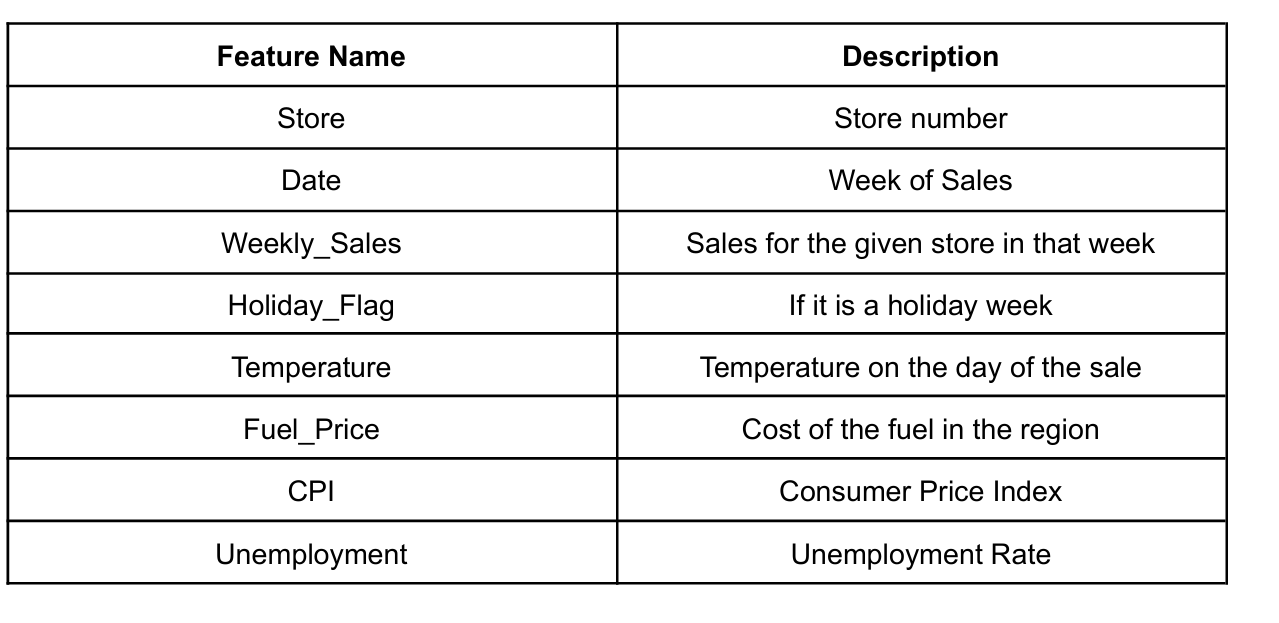

# Mounting Drive and Importing neccessarry libraries
> Reading the csv file <br>
> Analyzing the data.<br>
> Shape, info about each feature.<br>


In [ ]:
#mounting drive in google colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading the dataset
data_set = pd.read_csv("/content/drive/MyDrive/Datasets/Walmart DataSet.csv")

In [ ]:
data_set

In [ ]:
data_set.shape

In [ ]:
data_set.info()

In [ ]:
data_set.tail()

In [ ]:
data_set["Date"] = pd.to_datetime(data_set["Date"],format="%d-%m-%Y")

In [ ]:
data_set

# Functions For DataCleaning:

In [ ]:
data_set["Store"].nunique() # There are total 45 stores numbered 1 - 45

In [ ]:
""" Creating a function to take store no from user """
def storeData(data_set):
  storeNo = int(input("Enter the store number to get data:"))
  store = data_set[(data_set['Store'] == storeNo)]
  sales = pd.DataFrame(store["Weekly_Sales"].groupby(store.Date).sum())
  sales = sales.reset_index()
  sales = sales.asfreq('W-FRI', fill_value=0)
  #to convert the column to index
  return sales

In [ ]:
## Stored all the stores data in the list:
def makeSeprate(data_set):
  lis = []
  total_stores = data_set["Store"].unique()
  for i in total_stores:
    sd = data_set[(data_set['Store'] == i)]
    sales = pd.DataFrame(sd["Weekly_Sales"].groupby(sd.Date).sum())
    sales = sales.sort_index()
    processed = sales.asfreq('W-FRI', fill_value=0)
    if not processed.empty:
      lis.append(processed)
  return lis

#EDA





In [ ]:
# Null values
# duplicates
# missing

data_set.isnull().sum().sum()  # No null values are present
data_set.duplicated().sum().sum() # No duplicate values.
# No Missing  Values Found in data

In [ ]:
lis = makeSeprate(data_set)

# Visualization for each store

In [ ]:
def plot_all_weekly_sales(store_list):
    fig, axs = plt.subplots(15, 3, figsize=(18,60))
    fig.suptitle("Weekly Sales Across All Stores", fontsize=20, y=1.02)

    axs = axs.flatten()

    for i, store_df in enumerate(store_list):
        if i >= len(axs):
            break

        rmean = store_df['Weekly_Sales'].rolling(window=52).mean()
        rstd = store_df['Weekly_Sales'].rolling(window=52).std()
        axs[i].plot(store_df['Weekly_Sales'], color='blue')
        axs[i].plot(rmean, color="red")
        axs[i].plot(rstd, color="black")
        axs[i].legend(['Weekly_Sales', 'Rolling Mean', 'Rolling Std'])
        axs[i].set_title(f'Store {i+1}', fontsize=10)
        axs[i].tick_params(axis='x', labelrotation=45)
        axs[i].grid(True)

    for j in range(len(store_list), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.savefig("all_weekly_sales.png")
    plt.show()

In [ ]:
## In Python, enumerate() is a built-in function that
## lets you loop through an iterable (like a list or DataFrame)
## while keeping track of the index of each item
plot_all_weekly_sales(lis) # Call the function without assigning to plt

#Questions:


In [ ]:
""" 1. """
# If the weekly sales are affected by the unemployment rate, if yes - which stores
# are suffering the most?
"""ANS:"""

correlation = data_set["Weekly_Sales"].corr(data_set["Unemployment"])
print(f"Corelation:{correlation:.5f}")
# finding correlation of between "Weekly_Sales" And "Unemployment" for each store
store_corr = data_set.groupby('Store').apply(lambda x: x['Weekly_Sales'].corr(x["Unemployment"])).reset_index(name="Correlation")
store_corr = store_corr.sort_values(by="Correlation")
most_suffering = store_corr[(store_corr["Correlation"]<-0.09)]
most_suffering_stores_list = list(most_suffering["Store"])
""" ANS:"""
print("The most suffering stoes are :",most_suffering_stores_list)

In [ ]:
""" 2. """
#if the weekly sales show a seasonal trend, when and what could be the reason?

"""ANS:""" # Yes , There is a seasonal trend at begining of every year. i.e.
# (2011-01) ,(2012-01).
# This trend may be due to new year sale/ or any offer.
# Due to new year.

In [ ]:
""" 3 """
#  Does temperature affect the weekly sales in any manner?

"""ANS:"""
cortemp = data_set['Temperature'].corr(data_set["Weekly_Sales"])
print(f"Temperature vs Correlation: {cortemp:.3f}")

store_temp_corr = data_set.groupby("Store").apply(
    lambda x: x["Weekly_Sales"].corr(x["Temperature"])
).reset_index(name="Temp_Correlation")
store_temp_corr.sort_values("Temp_Correlation").head()



# However the correlation  is negative   b/w temperature and weekly sales
# But it's negligible therefore temperature dosen't effect the sales much.
# But for some stores like [10,12,3,28,30] there is minimal effect.

In [ ]:
""" 4 """
# How is the Consumer Price index affecting the weekly sales of various stores?
store_CPI_corr = data_set.groupby("Store").apply(
    lambda x: x["Weekly_Sales"].corr(x["CPI"])
).reset_index(name="CPI")


## Store  [36,35,14,30,43,27,18,15,21,19,10]  "have negative  correlation"
## i.e. the more the CPI the less the Sales.

store_CPI_corr_sorted = store_CPI_corr.sort_values("CPI").reset_index(drop=True)

# Create a figure and axis
plt.figure(figsize=(15, 7))

# Bar plot
bars = plt.bar(
    x=store_CPI_corr_sorted.index,
    height=store_CPI_corr_sorted["CPI"],
    color="skyblue",
    label="CPI Correlation (Bar)"
)

# Line plot (over same x-axis)
plt.plot(
    store_CPI_corr_sorted.index,
    store_CPI_corr_sorted["CPI"],
    color="red",
    marker="o",
    linewidth=2,
    label="CPI Correlation (Line)"
)

# Add store labels to x-axis
plt.xticks(store_CPI_corr_sorted.index, store_CPI_corr_sorted["Store"], rotation=90)

# Labels and title
plt.xlabel("Store")
plt.ylabel("Correlation with CPI")
plt.title("Store-wise Correlation between CPI and Weekly Sales")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-3852547704.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Store", y="Weekly_Sales", data=top_stores.head(10), palette="viridis")


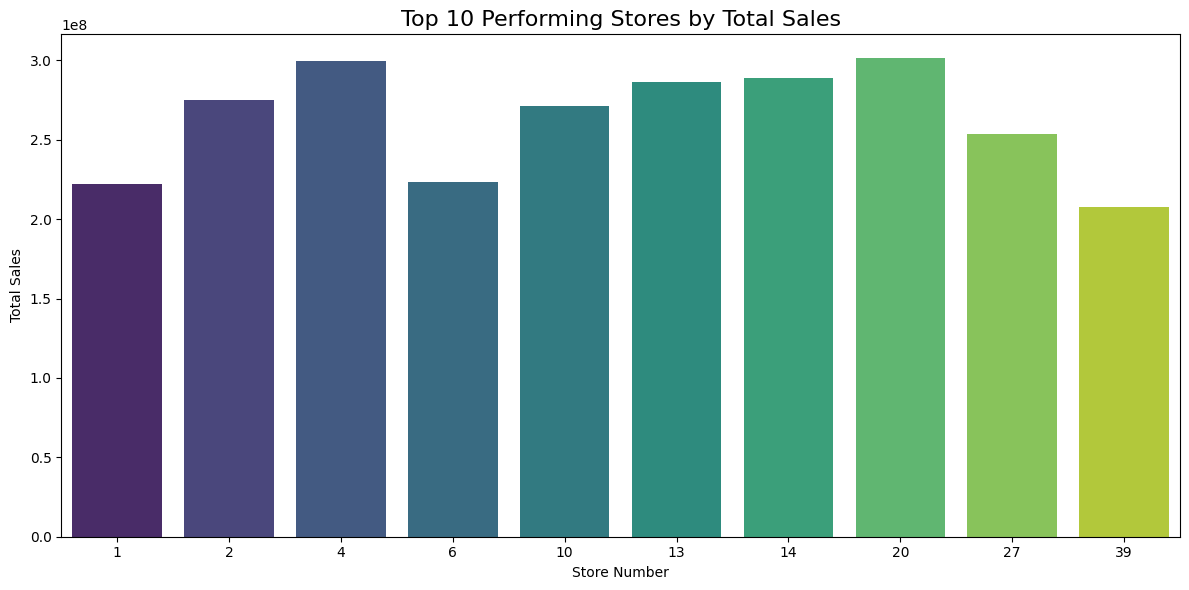

Best Performing Stores are:(1, 2, 4, 6, 10, 13, 14, 20, 27, 39)


In [133]:
"""5"""

# Top performing stores according to the historical data.

"""ANS:"""

top_stores = data_set.groupby("Store")["Weekly_Sales"].sum().reset_index()
top_stores = top_stores.sort_values(by="Weekly_Sales", ascending=False).reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.barplot(x="Store", y="Weekly_Sales", data=top_stores.head(10), palette="viridis")
plt.title("Top 10 Performing Stores by Total Sales", fontsize=16)
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

print(f"Best Performing Stores are:{1,2,4,6,10,13,14,20,27,39}")

/tmp/ipython-input-576986880.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Store", y="Weekly_Sales", data=worst_performing_stores.head(10), palette="viridis")


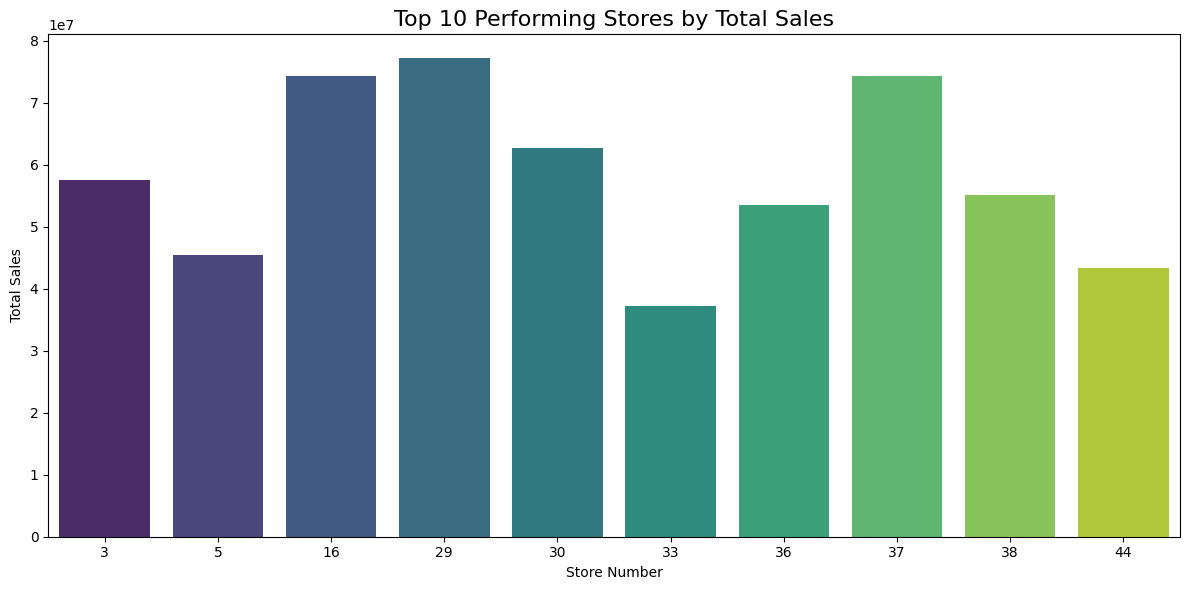

Worst Performing Stores are :(3, 5, 16, 29, 30, 33, 36, 37, 38, 41)


In [131]:
# The worst performing store, and how significant is the difference between the
# highest and lowest performing stores.

worst_performing_stores = data_set.groupby("Store")["Weekly_Sales"].sum().reset_index()
worst_performing_stores = worst_performing_stores.sort_values(by="Weekly_Sales", ascending=True).reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.barplot(x="Store", y="Weekly_Sales", data=worst_performing_stores.head(10), palette="viridis")
plt.title("Top 10 Performing Stores by Total Sales", fontsize=16)
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

print(f"Worst Performing Stores are :{3,5,16,29,30,33,36,37,38,41}")

In [138]:
performance_diff = top_stores["Weekly_Sales"] - worst_performing_stores["Weekly_Sales"]

In [143]:
performance_diff.head(10)

,Weekly_Sales
0,2.642376e+08
1,2.562509e+08
2,2.435242e+08
3,2.331055e+08
4,2.202228e+08
5,2.140310e+08
6,1.911390e+08
7,1.495534e+08
8,1.481504e+08
9,1.303040e+08


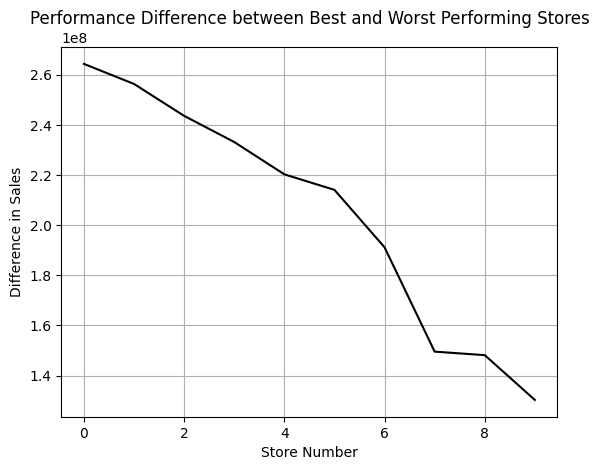

In [148]:
plt.plot(performance_diff.head(10),color="Black")
plt.grid()
plt.xlabel("Store Number")
plt.ylabel("Difference in Sales")
plt.title("Performance Difference between Best and Worst Performing Stores")
plt.show()

# Seasonal_Decompose:

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompostion = seasonal_decompose(lis[37]["Weekly_Sales"], period=52)
fig = plt.figure()
fig = decompostion.plot()
fig.set_size_inches(12,10)
plt.suptitle('Seasonal Decomposition of Weekly Sales for Store 5', fontsize=16, y=1.02)
plt.xlabel("time")
plt.show()

In [ ]:
#performing EDA:

In [ ]:
#Use predictive modeling techniques to forecast the sales for each store for the next 12
#weeks.

# Performing Augmented Dickey Fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller

Takig alpha value as 0.10for the null hypothesis threshold

In [ ]:
p_values_each_store = []
for i in range(len(lis)):
  result = adfuller(lis[i]["Weekly_Sales"])
  p_values_each_store.append(result[1])

stationary_store  = {
    "Store" : [i+1 for i in range(len(p_values_each_store)) if(p_values_each_store[i]<0.05)],
    "p_values": [p_values_each_store[i] for i in range(len(p_values_each_store)) if(p_values_each_store[i]< 0.05)],
    "Store_No": [i+1 for i in range(len(p_values_each_store)) if(p_values_each_store[i]<=0.05)]
}

non_stationary_store = {
    "Store": [i + 1 for i, p in enumerate(p_values_each_store) if p >= 0.05],
    "P_values": [p for p in p_values_each_store if p >= 0.05]
}

In [ ]:
print(f"No of Non Stationary Stores:{len(non_stationary_store['Store'])}")
print(f"No of Stationary Stores:{len(stationary_store['Store'])}")
print(f"Stationary Store no:{stationary_store['Store_No']}")

In [ ]:
# 7 stores dataset is not stationary performing the diffrencing and log transformation.

# Making the dataset Stationary

> Using operation rolling mean to detrend

**Determination of Window size**
<br>
> Rule of thumb: <br> A commonly used rule of thumb for choosing the window size is to use 10% to 25% of the length of the time series. For example, if the time series has 100 data points, a window size of 10 to 25 data points might be appropriate.

> In this dataset each column has 143 records so we can take 0.25 * 143 = 35.75 ~ 36.


In [ ]:
def plot_non_stationary_stores(store_list, non_stationary_store, window=36):
    import matplotlib.pyplot as plt

    store_numbers = non_stationary_store["Store"]
    p_values = non_stationary_store["P_values"]

    fig, axs = plt.subplots(len(store_numbers), 1, figsize=(5 * 1, 4 * (len(store_numbers))), sharex=False)
    fig.suptitle("Non-Stationary Stores: Original vs Rolling Mean vs Rolling Std", fontsize=20, y=1.02)

    if len(store_numbers) == 1:
        axs = [axs]

    for i, store_num in enumerate(store_numbers):
        p_val = p_values[i]
        store_df = store_list[store_num - 1]
        rolling_mean = store_df["Weekly_Sales"].rolling(window=window).mean()
        rolling_std = store_df["Weekly_Sales"].rolling(window=window).std()

        axs[i].plot(store_df["Weekly_Sales"], label="Original", color="red")
        axs[i].plot(rolling_mean, label="Rolling Mean", color="blue")
        axs[i].plot(rolling_std, label="Rolling Std", color="black")

        axs[i].set_title(f"Store {store_num} (p-value = {p_val:.4f})", fontsize=12)
        axs[i].tick_params(axis="x", labelrotation=45)
        axs[i].grid(True)
        axs[i].legend(loc="best")

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


In [ ]:
plot_non_stationary_stores(lis,non_stationary_store)

In [ ]:
# Removing the Null values from whole dataset
for i in range(len(lis)):
  lis[i].dropna(inplace=True)

# Taking 5 stores for model fitting

In [ ]:
## Taking 5 Stores with Stationary-Data and Ploting ACF and PACF plots
store_5= lis[4]
store_10 = lis[39]
store_15 = lis[14]
store_20 = lis[19]
store_25 = lis[24]

In [ ]:
store_5

In [ ]:
store_10

In [ ]:
store_15

In [ ]:
store_20

In [ ]:
store_25

# Plotting  the ACF and PACF plot for determining the p  and q parameter.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
acf_5 = plot_acf(store_5["Weekly_Sales"])

acf_10 = plot_acf(store_10["Weekly_Sales"])
acf_15 = plot_acf(store_15["Weekly_Sales"])
acf_20 = plot_acf(store_20["Weekly_Sales"])
acf_25 = plot_acf(store_25["Weekly_Sales"])

In [ ]:
pacf_5 = plot_pacf(store_5["Weekly_Sales"], color="Black")
pacf_10 = plot_pacf(store_10["Weekly_Sales"], color= "Black")
pacf_15 = plot_pacf(store_15["Weekly_Sales"], color = "Black")
pacf_20 = plot_pacf(store_20["Weekly_Sales"], color = "Black")
pacf_25 = plot_pacf(store_25["Weekly_Sales"], color = "Black")

# Parameters:
> As The dataset has seasonality in every 1 year therefore taking Sarimax model for evaluation. <br>
> Parameters for stores **[5,10,15,20,25]** which is best fitted are p = 1, d=1, q = 1.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Model for store_5

In [ ]:
len(store_5.loc["2011-11-11":])

In [ ]:
model_sarima = SARIMAX(store_5['Weekly_Sales'], order=(1,1,1), seasonal_order=(1,1,1,52))

In [ ]:
res = model_sarima.fit()

In [ ]:
forecast_5 = res.predict(start= "2011-11-11" , end=len(store_5)+63) # forecasting for next 12 weeks as start is "2011-11-11" so taking end as  51 + 12 = 63

In [ ]:
pd.set_option("display.max_rows",None)

In [ ]:
forecast_5

In [ ]:
plt.plot(forecast_5, color="Green")

In [ ]:
plt.plot(store_5["Weekly_Sales"])
plt.plot(forecast_5, color = "Green")

#Model for store_10

In [149]:
model_10 = SARIMAX(store_10['Weekly_Sales'], order=(1,1,1), seasonal_order=(1,1,1,52))

In [150]:
res_10 = model_10.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [151]:
forecast_5 = res.predict(start= "2011-11-11" , end=len(store_10)+63) # forecasting for next 12 weeks as start is "2011-11-11" so taking end as  51 + 12 = 63

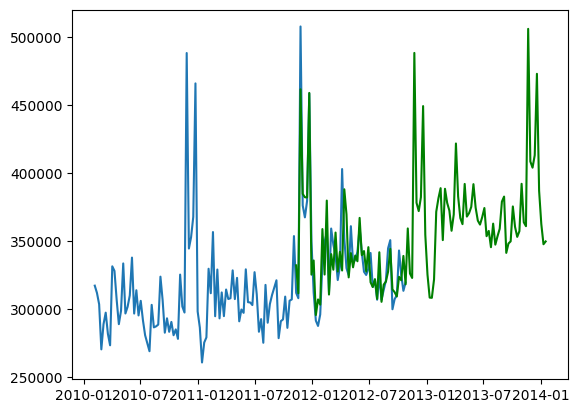

In [152]:
plt.plot(store_5["Weekly_Sales"])
plt.plot(forecast_5, color = "Green")

#Model for store 15

In [153]:
model_15 = SARIMAX(store_15['Weekly_Sales'], order=(1,1,1), seasonal_order=(1,1,1,52))

In [154]:
res_15 = model_15.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [156]:
forecast_15 = res_15.predict(start= "2011-11-11" , end=len(store_15)+63)

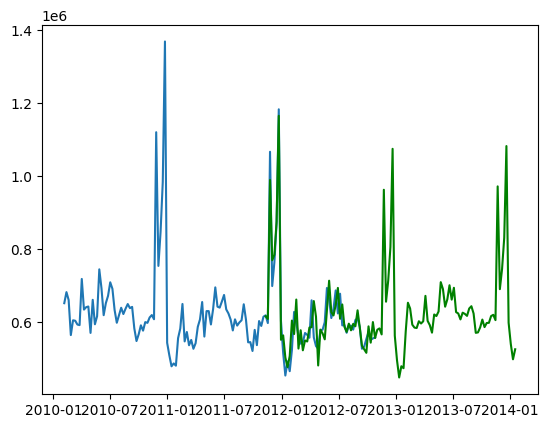

In [157]:
plt.plot(store_15["Weekly_Sales"])
plt.plot(forecast_15, color = "Green")

#Model for store 20

In [159]:
model_20 = SARIMAX(store_20['Weekly_Sales'], order=(1,1,1), seasonal_order=(1,1,1,52))

In [160]:
res_20 = model_20.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [161]:
forecast_20 = res_20.predict(start= "2011-11-11" , end=len(store_20)+63)

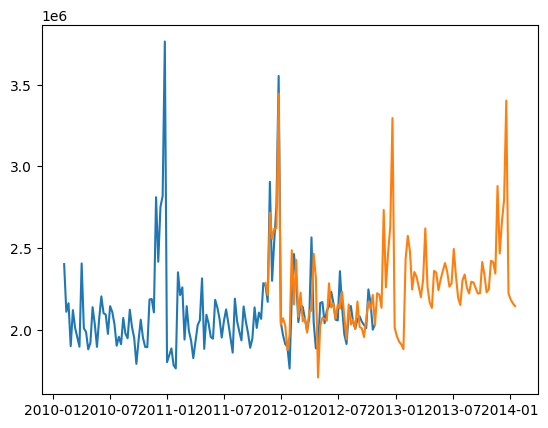

In [162]:
plt.plot(store_20["Weekly_Sales"])
plt.plot(forecast_20)

#Model for store 25

In [163]:
model_25 = SARIMAX(store_25['Weekly_Sales'], order=(1,1,1), seasonal_order=(1,1,1,52))

In [164]:
res_25 = model_25.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [165]:
forecast_25 = res_25.predict(start= "2011-11-11" , end=len(store_25)+63)

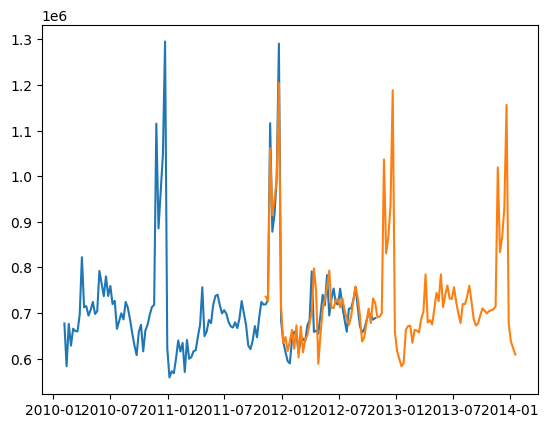

In [166]:
plt.plot(store_25["Weekly_Sales"])
plt.plot(forecast_25)

# Function for modeling a model for particular store using the constant parameter of p , d, q and seasonal order

In [167]:
def model_n(store_list, store_no):
  model_n = SARIMAX(store_list['Weekly_Sales'], order=(1,1,1), seasonal_order=(1,1,1,52))
  res_n = model_n.fit()
  forecast_n = res_n.predict(start= "2011-11-11" , end=len(store_list)+63)
  plt.plot(store_list["Weekly_Sales"])
  plt.plot(forecast_n)

#The inference is sales for the wallmart will be same as past but if there are some pandamic and any uncertain event then sales can be affected